In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('PLUTO subset CUNY data challenge.xlsx')

In [3]:
df.head()

,borough,block,lot,cd,ct2010,cb2010,schooldist,council,zipcode,firecomp,...,pfirm15_flag,rpaddate,dcasdate,zoningdate,landmkdate,basempdate,masdate,polidate,edesigdate,geom
0,BK,8720,2219,NaN,0.00,NaN,NaN,NaN,NaN,NaN,...,NaN,2019-07-06,2018-10-25,2019-07-29,2019-07-05,2019-07-26,NaN,NaN,2019-05-31,NaN
1,QN,7781,30,411.0,1291.02,1011.0,26.0,23.0,11427.0,E301,...,NaN,2019-07-06,2018-10-25,2019-07-29,2019-07-05,2019-07-26,NaN,NaN,2019-05-31,0106000020E61000000100000001030000000100000006...
2,QN,7794,436,411.0,1291.02,1000.0,26.0,23.0,11427.0,E326,...,NaN,2019-07-06,2018-10-25,2019-07-29,2019-07-05,2019-07-26,NaN,NaN,2019-05-31,0106000020E61000000100000001030000000100000006...
3,QN,7810,30,411.0,1291.02,3000.0,26.0,23.0,11427.0,E326,...,NaN,2019-07-06,2018-10-25,2019-07-29,2019-07-05,2019-07-26,NaN,NaN,2019-05-31,0106000020E61000000100000001030000000100000005...
4,QN,7816,48,411.0,1291.02,2009.0,26.0,23.0,11427.0,E301,...,NaN,2019-07-06,2018-10-25,2019-07-29,2019-07-05,2019-07-26,NaN,NaN,2019-05-31,0106000020E61000000100000001030000000100000005...


In [4]:
df.shape

(10000, 96)

#### What is the unique identifier in this dataset? 
bbl

In [5]:
df.nunique().sort_values(ascending = False).head()

bbl          10000
geom          9965
address       9871
ownername     9660
xcoord        9171
dtype: int64

#### Which record is the largest tax lot?  How many buildings are on this tax lot?
The record with bbl as 4123190001 is the largest tax lot. No building is in this tax lot

In [6]:
df[df.lotarea == df.lotarea.max()].bbl

5888    4123190001
Name: bbl, dtype: int64

In [7]:
df[df.lotarea == df.lotarea.max()].numbldgs

5888    0.0
Name: numbldgs, dtype: float64

#### How many unique building classes are in this dataset?
143

In [8]:
df.bldgclass.nunique()

143

#### What is the most frequent land use type?
01

In [9]:
df.groupby('landuse').landuse.count()

landuse
1.0     7036
2.0     1323
3.0      104
4.0      406
5.0      174
6.0       78
7.0       80
8.0       90
9.0       42
10.0      84
11.0     554
Name: landuse, dtype: int64

#### What inconsistencies exist in this dataset?  List three. 

1. There are 25 records missing values in `numbldgs`, `lotfront` and `bldgfront`, which is abnormal when we look at the Missing value heatmap as a whole. Below are the list of records.
2. There are 4 records having `yearalter2` earliear than `yearalter1`.
3. There are 7 records having `yearalter1` earliear than `yearbuilt`.
4. There are 2 records having `yearalter2` earliear than `yearbuilt`.
5. There are 834 records having the sum of the various floor area fields bigger than `bldgarea`.
6. By calculating the building FAR using bldgarea devided by lotarea, there are 3 records having `builtfar` different from the calulated building FAR by 10%

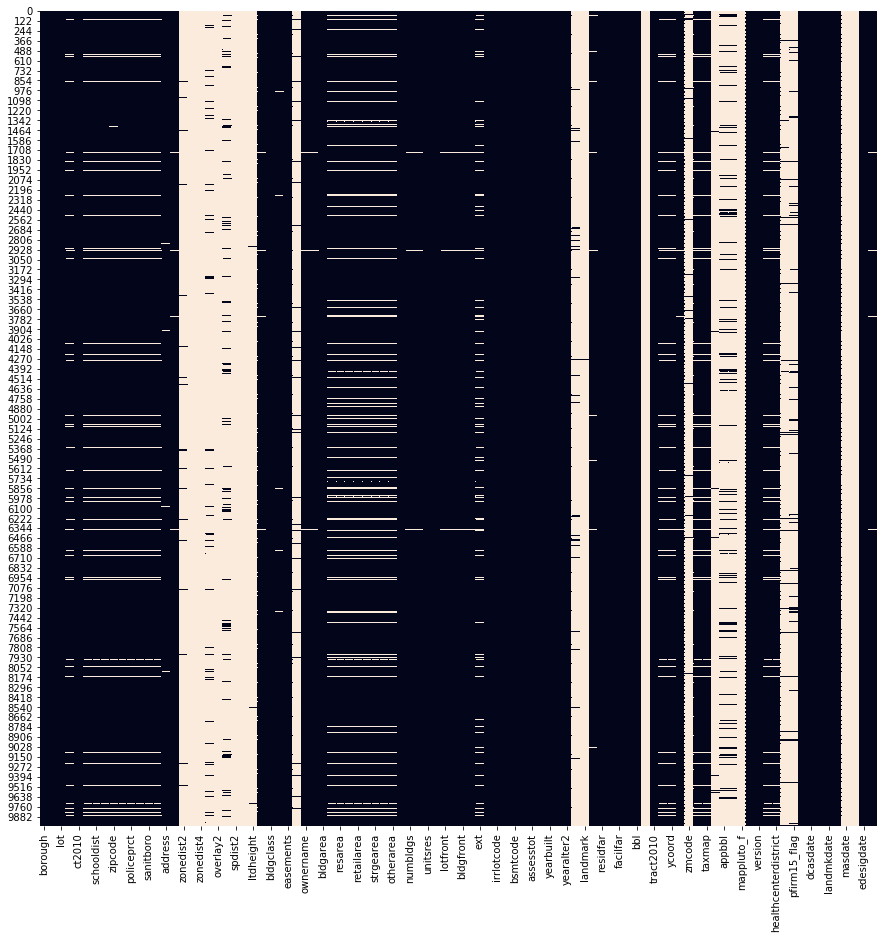

In [10]:
fig= plt.figure(figsize=(15,15))
sns.heatmap(df.isnull(), cbar=False)

1. There are 25 records missing values in `numbldgs`, `lotfront` and `bldgfront`, which is abnormal when we look at the Missing value heatmap as a whole. Below are the list of records.

In [11]:
df[(df.numbldgs.isnull()) & (df.lotfront.isnull()) & (df.bldgfront.isnull())].bbl

0       3087202219
583     4050661892
1115    3087202717
1198    1009011017
1402    3087201618
1744    3000451166
2946    3051071016
3153    1009011039
3171    3087202312
3381    3033681129
3524    1000169037
4104    3087201750
4464    3087202888
4546    3087202523
5060    3087201514
5670    1006991411
5762    3033681118
5795    4050661932
5906    4050661727
6367    4050661743
6529    1006991420
7089    3000451055
7571    4039161213
9117    3087202118
9927    1009011012
Name: bbl, dtype: int64

2. There are 4 records having `yearalter2` earliear than `yearalter1`.

In [12]:
df[['bbl','yearalter1','yearalter2']][(df.yearalter1 > df.yearalter2) & df.yearalter2 != 0]

,bbl,yearalter1,yearalter2
4913,3006610032,2007,1999
6712,3051070091,2018,2017
8553,4050610010,2011,2009
9637,1005760010,2008,1995


3. There are 7 records having `yearalter1` earliear than `yearbuilt`.

In [13]:
df[['bbl','yearbuilt','yearalter1']][(df.yearbuilt > df.yearalter1) & df.yearalter1 != 0]

,bbl,yearbuilt,yearalter1
1455,3015840009,2013,2011
2825,3031860048,2017,2015
3041,1002800051,2015,2013
3355,3018140015,2018,2017
6631,3032750039,2017,2015
8040,3044520355,2016,2013
9571,2045390016,2018,2017


4. There are 2 records having `yearalter2` earliear than `yearbuilt`.

In [14]:
df[['bbl','yearbuilt','yearalter2']][(df.yearbuilt > df.yearalter2) & df.yearalter2 != 0]

,bbl,yearbuilt,yearalter2
6712,3051070091,2018,2017
9549,3017710011,2016,2015


5. There are 834 records having the sum of the various floor area fields bigger than `bldgarea`.

In [15]:
df['cal_bldgarea'] = df.comarea + df.resarea + df.officearea + \
                    df.retailarea + df.garagearea + df.strgearea + \
                    df.factryarea + df.otherarea

In [16]:
df.bbl[df.bldgarea < df.cal_bldgarea].count()

834

6. By calculating the building FAR using `bldgarea` devided by `lotarea`, there are 3 records having `builtfar` different from the calulated building FAR by 10%

In [17]:
df['cal_builtfar'] = round(df.bldgarea/df.lotarea,5)

In [18]:
df[abs(df.cal_builtfar - df.builtfar)/df.builtfar > 0.1][['bbl','builtfar', 'cal_builtfar']]

,bbl,builtfar,cal_builtfar
112,2045420200,0.01,0.00585
8172,5056640028,0.01,0.01387
9418,2056480206,0.02,0.02439
